In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv 
import tensorflow as tf 
import os 

from PIL import Image 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = [] # list
labels = []
classes = 43
current_path = os.getcwd()

In [7]:
for i in range(classes):
    path = os.path.join(current_path,'./Train/',str(i))
    images = os.listdir(path)

print(path)

/home/machio_b/Documents/Kaggle_Projects/./Train/42


In [15]:
for a in images:
    try:
        image = Image.open(path + '/'+a)
        image = image.resize((30,30))
        image = np.array(image)
        sim = Image.fromarray(image)
        data.append(image)
        labels.append(i)
        #print(sim)
    except:
            print("loading error")

In [16]:
#convert the list into a numpy array
data = np.array(data)
labels = np.array(labels)

#print(data.shape, labels.shape)

#splitting the training and the testing datasets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#convert the labels into one hot encoding -> to_cat
y_train = to_categorical(y_train,43) #to_cat is used with categorical cross-entropy
y_test = to_categorical(y_test, 43)

(768, 30, 30, 3) (192, 30, 30, 3) (768,) (192,)


In [20]:
#build the model
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5), activation='relu',
        input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25)) #dropout is used in fixing overfitting

model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten()) #prepare our layer to pass into a dense layer
    #used to make multi dimensional output linear

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#train the model
epochs = 15
validation = (x_test, y_test)
history = model.fit(x_train, y_train,batch_size=32, epochs=epochs, validation_data=validation)

Epoch 1/15
24/24 [==============================] - 3s 99ms/step - loss: 1.4414 - accuracy: 0.9466 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/15
24/24 [==============================] - 2s 89ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/15
24/24 [==============================] - 2s 89ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/15
24/24 [==============================] - 2s 87ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/15
24/24 [==============================] - 2s 90ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/15
24/24 [==============================] - 2s 85ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/15
24/24 [==============================] - 2s 91ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_l

In [21]:
#the .h5 file
model.save("traffic.h5")

KeyError: 'val_acccuracy'

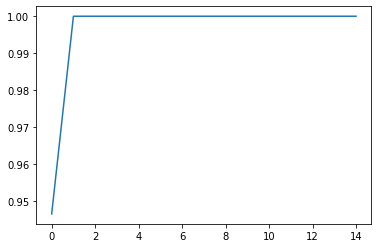

In [22]:
#plotting the graphs for accuracy
plt.figure(0) #creates a new figure
plt.plot(history.history['accuracy'], label="training_accuracy")
plt.plot(history.history['val_acccuracy'],label="val_accuracy")
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

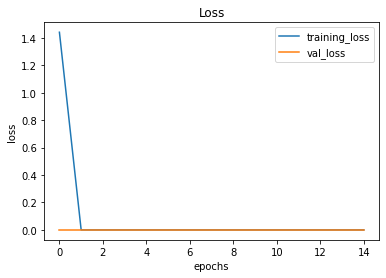

In [23]:
plt.figure(1) #creates another figure
plt.plot(history.history['loss'], label="training_loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.title("Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

FileNotFoundError: [Errno 2] No such file or directory: 'Test.csv'

In [28]:
from sklearn.metrics import accuracy_score
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

x_test = np.array(data)

pred = model.predict_classes(x_test)

#accuracy with the test data
print(accuracy_score(labels,pred))

NameError: name 'imgs' is not defined